# Project: TMDB (The Movie Database) 5000 Movie Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, I will be analyzing a dataset from TMDB (The Movie Database). The dataset could be downloaded [here](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&source=editors&ust=1653956169169040&usg=AOvVaw3NjICBc0o5HzMRr-oowG6I). 
This dataset consists of 21 columns: <br>

         1.  id
         2.  imdb_id               
         3.  popularity            
         4.  budget                  
         5.  revenue               
         6.  original_title         
         7.  cast                  
         8.  homepage              
         9.  director               
         10. tagline                
         11. keywords             
         12. overview              
         13. runtime               
         14. genres                 
         15. production_companies  
         16. release_date          
         17. vote_count             
         18. vote_average         
         19. release_year           
         20. budget_adj            
         21. revenue_adj          
 

### Question(s) for Analysis
> This analysis will be providing answers to these questions: <br>

    1. Which is the most popular movie? 
    2. What movie has the longest runtime? 
    3. What movie generated the highest revenue?
    4. Does the popularity of a movie determine the revenue generated?

In [3]:
#importing python libraries to be used for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#upgrading the pandas library
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> Here, I inspected my data to understand the structure and observe if there are any changes to be made.

### General Properties

In [5]:
#Loading dataset
movies_data = pd.read_csv("tmdb-movies.csv")
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#how many row(s) and column(s) does the dataset have?
movies_data.shape

(10866, 21)

In [7]:
#a summary statistics of the dataset
movies_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> Three issues were checked for in this dataset: missing values, duplicates and incorrect data types
 

In [8]:
#Inspecting the dataset to check for data types

movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
#checking for number of missing values per column
movies_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#dropping columns that are not needed, and of which dropping their missing values would affect the dataset
movies_data.drop(['homepage', 'production_companies', 'keywords', 'tagline', 'cast'], axis=1, inplace=True)

In [11]:
#affirming if the code block above ran
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [12]:
#dropping null values
movies = movies_data.dropna(axis = 0, how ='any')
movies.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [13]:
#checking for duplicates
movies.duplicated().value_counts()

False    10793
True         1
dtype: int64

In [14]:
#dropping the duplicate value(s) found
movies.drop_duplicates(inplace=True)

C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which is the most popular movie? 

In [15]:
#what movie has the maximum popularity value in the dataset?
most_popular_movie = movies[movies['popularity'] == movies['popularity'].max()]
most_popular_movie['original_title']

0    Jurassic World
Name: original_title, dtype: object

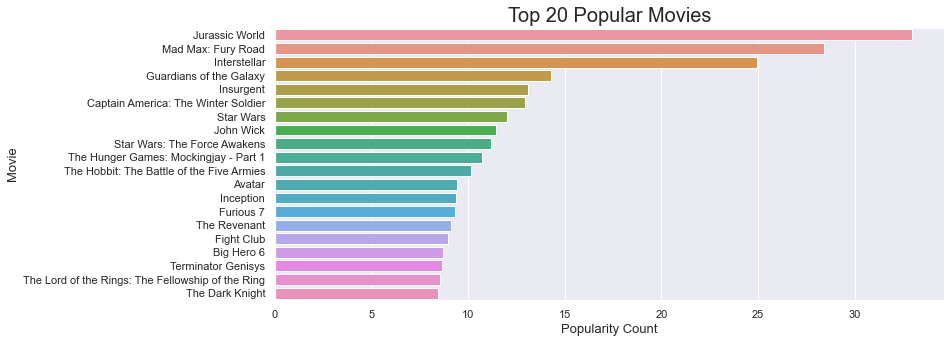

In [53]:
#sorting the popularity column in decending order
popularity_df = pd.DataFrame(movies['popularity'].sort_values(ascending = False))
popularity_df['original_title'] = movies['original_title']
data = list(map(str,(popularity_df['original_title'])))

#extracting the "top 20 movies with maximum popularity" data from the list and the dataframe
x = list(data[:20])
y = list(popularity_df['popularity'][:20])

ax= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("Top 20 Popular Movies",fontsize = 20)
ax.set_xlabel("Popularity Count",fontsize = 13)
ax.set_ylabel("Movie",fontsize = 13)
sns.set_style("darkgrid")

In [16]:
#more information on the most popular movie
most_popular_movie.loc[[0]]

,id,imdb_id,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Based on the above analysis, the most popular movie is "Jurassic World"

### Research Question 2 : What movie has the longest runtime?

In [29]:
#Creating or defining a function to determine the longest_runtime
def longest_runtime(runtime):
    longest = movies[movies['runtime'] == movies['runtime'].max()]
    return longest['original_title']

#Calling the function
longest_runtime = longest_runtime('runtime')
print(longest_runtime)

3894    The Story of Film: An Odyssey
Name: original_title, dtype: object


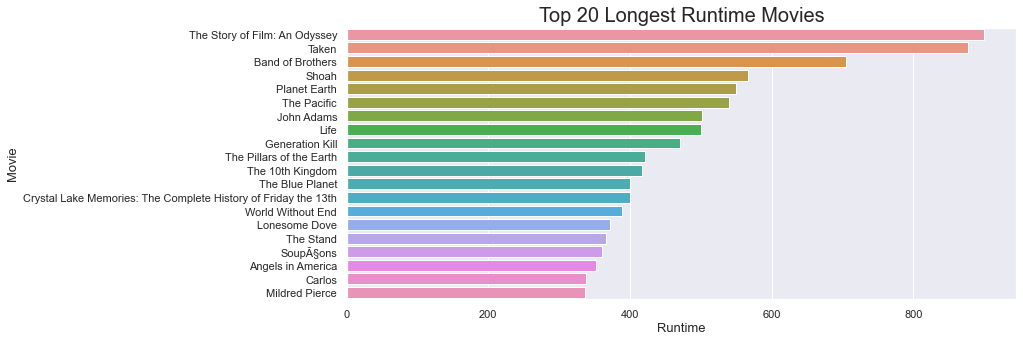

In [55]:
#sorting the runtime column in decending order
runtime_df = pd.DataFrame(movies['runtime'].sort_values(ascending = False))
runtime_df['original_title'] = movies['original_title']
data = list(map(str,(runtime_df['original_title'])))

#extracting the "top 20 movies with long runtime" data from the list and the dataframe
x = list(data[:20])
y = list(runtime_df['runtime'][:20])

ax= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("Top 20 Longest Runtime Movies",fontsize = 20)
ax.set_xlabel("Runtime",fontsize = 13)
ax.set_ylabel("Movie",fontsize = 13)
sns.set_style("darkgrid")

"The Story of Film: An Odyssey", as we can see above, has the longest runtime

### Research Question 3 : What movie generated the highest revenue?

In [35]:
#What movie has the highest revenue value in the dataset?
highest_revenue = movies[movies['revenue'] == movies['revenue'].max()]
highest_revenue['original_title']

1386    Avatar
Name: original_title, dtype: object

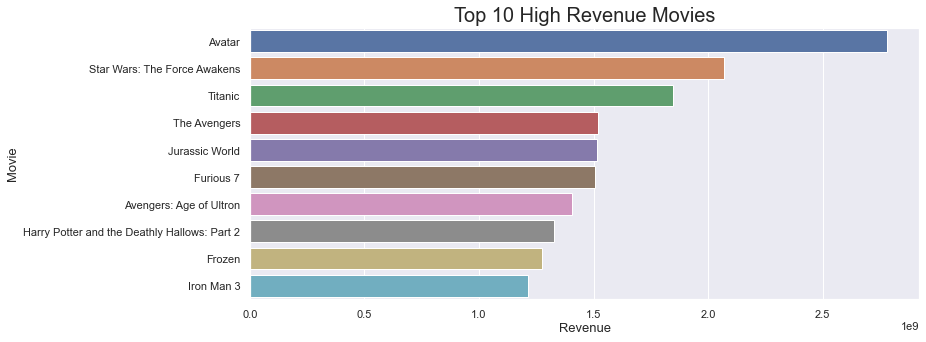

In [59]:
#sorting the revenue column in decending order
revenue_df = pd.DataFrame(movies['revenue'].sort_values(ascending = False))
revenue_df['original_title'] = movies['original_title']
data = list(map(str,(revenue_df['original_title'])))

#extracting the "top 20 movies with high revenue" data from the list and the dataframe
x = list(data[:10])
y = list(revenue_df['revenue'][:10])

ax= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 20)
ax.set_xlabel("Revenue",fontsize = 13)
ax.set_ylabel("Movie",fontsize = 13)
sns.set_style("darkgrid")

In [36]:
#more information about the movie that generated the highest revenue
highest_revenue.loc[[1386]]

,id,imdb_id,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


As shown in the code blocks above, the movie "Avatar" generated the highest revenue.

### Research Question 4 : Does the popularity of a movie determine the revenue generated?

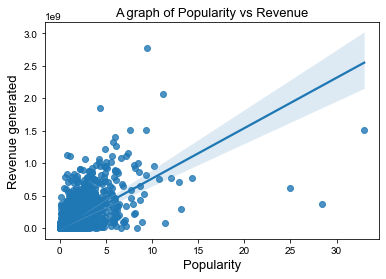

In [21]:
#plotting a graph to visualize the relationship between popularity and revenue
ax = sns.regplot(x="popularity", y="revenue", data=movies)
ax.set_title("A graph of Popularity vs Revenue",fontsize=13)
ax.set_xlabel("Popularity",fontsize=13)
ax.set_ylabel("Revenue generated",fontsize=13)
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("whitegrid")

In [48]:
#Calculating the correlation coefficient between popularity and revenue
correlation = movies["popularity"].corr(movies["revenue"])
correlation 

0.6630780685327201

Based on the above visualization, there is a linear relationship between popularity and the revenue generated (shown by the straight line). However, the correlation coefficient is 0.66, which shows that although there is a correlation, it is not very strong (it's a moderate correlation).

<a id='conclusions'></a>
## Conclusions

Based on analysis done, it can be concluded that the most popular movie is "Jurassic World", which was directed by Colin Trevorrow. "The Story of Film: An Odyssey" had the longest runtime.
"Avatar", directed by James Cameron generated the highest revenue, totalling over 2.7 billion.
Furthermore, a positive linear relationship is observed between popularity and revenue. This indicates that as popularity increases, there is a corresponding increase in revenue generated. However, this relationship isn't a strong one.

### Limitation(s)
Variables like the revenue was not assigned any specific currency unit. It could be possible that the revenue value might assume that of the country in which the movie was produced.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])